# Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

In [0]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [8]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


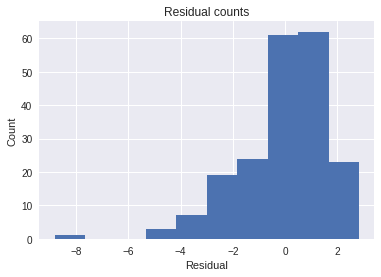

In [9]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

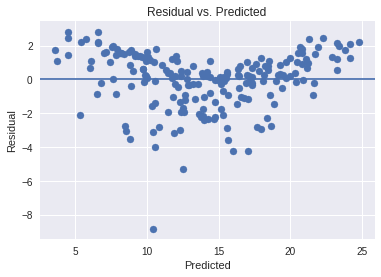

In [10]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [11]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


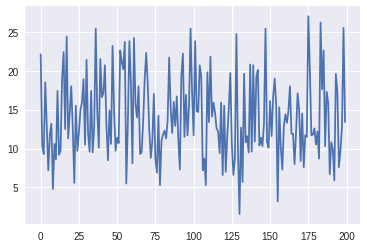

In [12]:
plt.plot(data['Sales'])
plt.show()

<function matplotlib.pyplot.show>

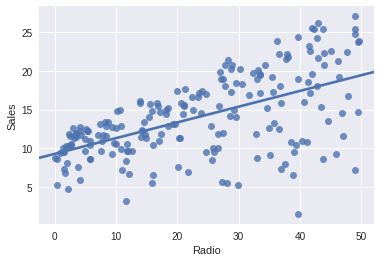

In [14]:
sns.regplot(data['Radio'], data['Sales'], ci = False)
plt.show

<function matplotlib.pyplot.show>

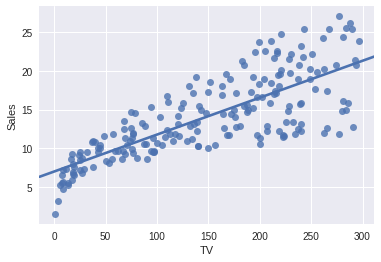

In [15]:
sns.regplot(data['TV'], data['Sales'], ci = False)
plt.show

<function matplotlib.pyplot.show>

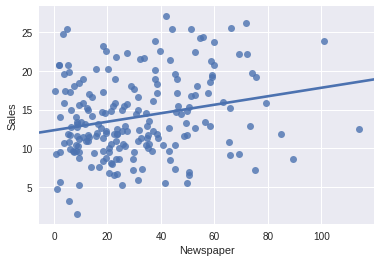

In [16]:
sns.regplot(data['Newspaper'], data['Sales'], ci = False)
plt.show

It appears that Newspaper ads does not have a linear relationship with sales and a transformation still does not yield any relationship.

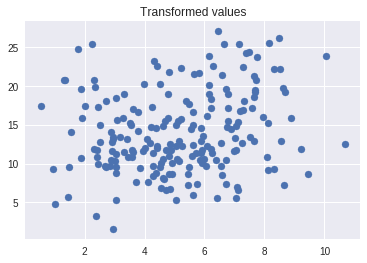

In [22]:
sqrt_nwsppr = [math.sqrt(x) for x in  data['Newspaper']]
               
plt.scatter(sqrt_nwsppr, data['Sales'])
plt.title('Transformed values')
plt.show()

Since the values are all positive, we attempt a boxcox transformation.

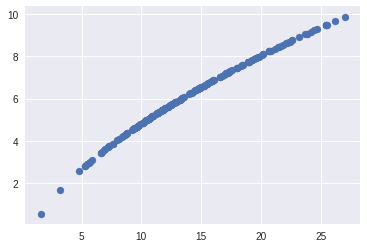

In [24]:
from scipy.stats import boxcox

bc = boxcox(data['Sales'])

plt.scatter(data['Sales'], bc[0])
plt.show()

data['Sales_bc'] = bc[0]

In [26]:
regr = linear_model.LinearRegression()
Y = data['Sales_bc']
X=data[['TV', 'Radio']]
regr.fit(X,Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X,Y))


Coefficients: 
 [0.01547779 0.05856743]

Intercept: 
 2.4517637266313868

R-squared: 
 0.8827842059311956


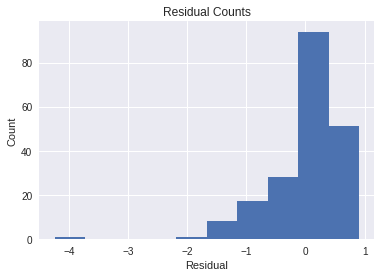

In [28]:
predicted = regr.predict(X).ravel()
actual = data['Sales_bc']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

We see that the residual values are now homoscedastic.

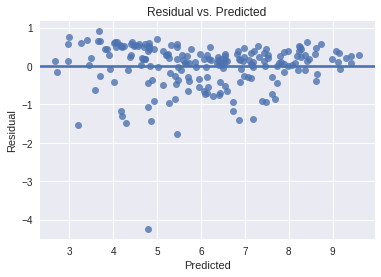

In [29]:
sns.regplot(predicted, residual, ci = False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

Additionally, the residual values have a linear relationship to sales. Therefore, we can accept the model despite not being able to linearly relate Newspaper ads to sales.

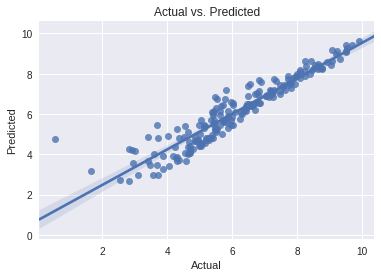

In [30]:
sns.regplot(actual,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()